In [12]:
import os
import sys

# Get the current working directory of the notebook
notebook_dir = os.getcwd()

# Assume the project root is one level up from the notebooks directory
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))

# Add the project root to Python's system path
if project_root not in sys.path:
    sys.path.append(project_root)

print(f"Added '{project_root}' to sys.path.")
print(f"Current working directory: {notebook_dir}")

# You might also want to change the working directory to the project root for easier path management
# %cd {project_root} # Uncomment this if you want notebook's working directory to be project root

Added '/Users/patriciawatanabe/Projects/RA_classification_CNN' to sys.path.
Current working directory: /Users/patriciawatanabe/Projects/RA_classification_CNN/notebooks


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import os
print(os.getcwd())
# Optionally import seaborn for nicer plots
import seaborn as sns
import tensorflow as tf

/Users/patriciawatanabe/Projects/RA_classification_CNN/notebooks


In [21]:
# Assuming you are in the project root or adjust path accordingly
from src.config_transfer import MODELS_DIR, HISTORY_NAME, MODEL_NAME
# If not importing config_transfer, manually define paths:
MODELS_DIR = 'models' # Or the full path if running from outside project root
HISTORY_NAME = 'training_history_transfer.csv'
MODEL_NAME = 'ra_classifier_transfer_cnn.h5' # For confusion matrix

history_file_path = os.path.join('..', 'models', 'training_history_transfer.csv')
model_file_path = os.path.join('..', 'models', 'ra_classifier_transfer_cnn.h5') # <--- ADJUSTED PATH

best_model = tf.keras.models.load_model(model_file_path)


In [8]:
# Load the training history from the CSV file
history_df = pd.read_csv(history_file_path)
print(history_df.head()) # See the first few rows

       loss  accuracy  precision    recall   auc_roc  val_loss  val_accuracy  \
0  0.543088  0.717955   0.728261  0.695381  0.801356  0.682787      0.536685   
1  0.398422  0.820446   0.824423  0.815026  0.900800  0.619103      0.722826   
2  0.341913  0.852102   0.860181  0.840519  0.927738  0.591432      0.732337   
3  0.314166  0.862221   0.868074  0.854102  0.939275  0.452474      0.805707   
4  0.279875  0.881162   0.880249  0.882078  0.952372  0.491224      0.754076   

   val_precision  val_recall  val_auc_roc      lr  
0       0.340909    0.746269     0.582545  0.0001  
1       0.000000    0.000000     0.576469  0.0001  
2       0.500000    0.010152     0.556803  0.0001  
3       0.786408    0.400990     0.856273  0.0001  
4       0.818182    0.133663     0.810287  0.0001  


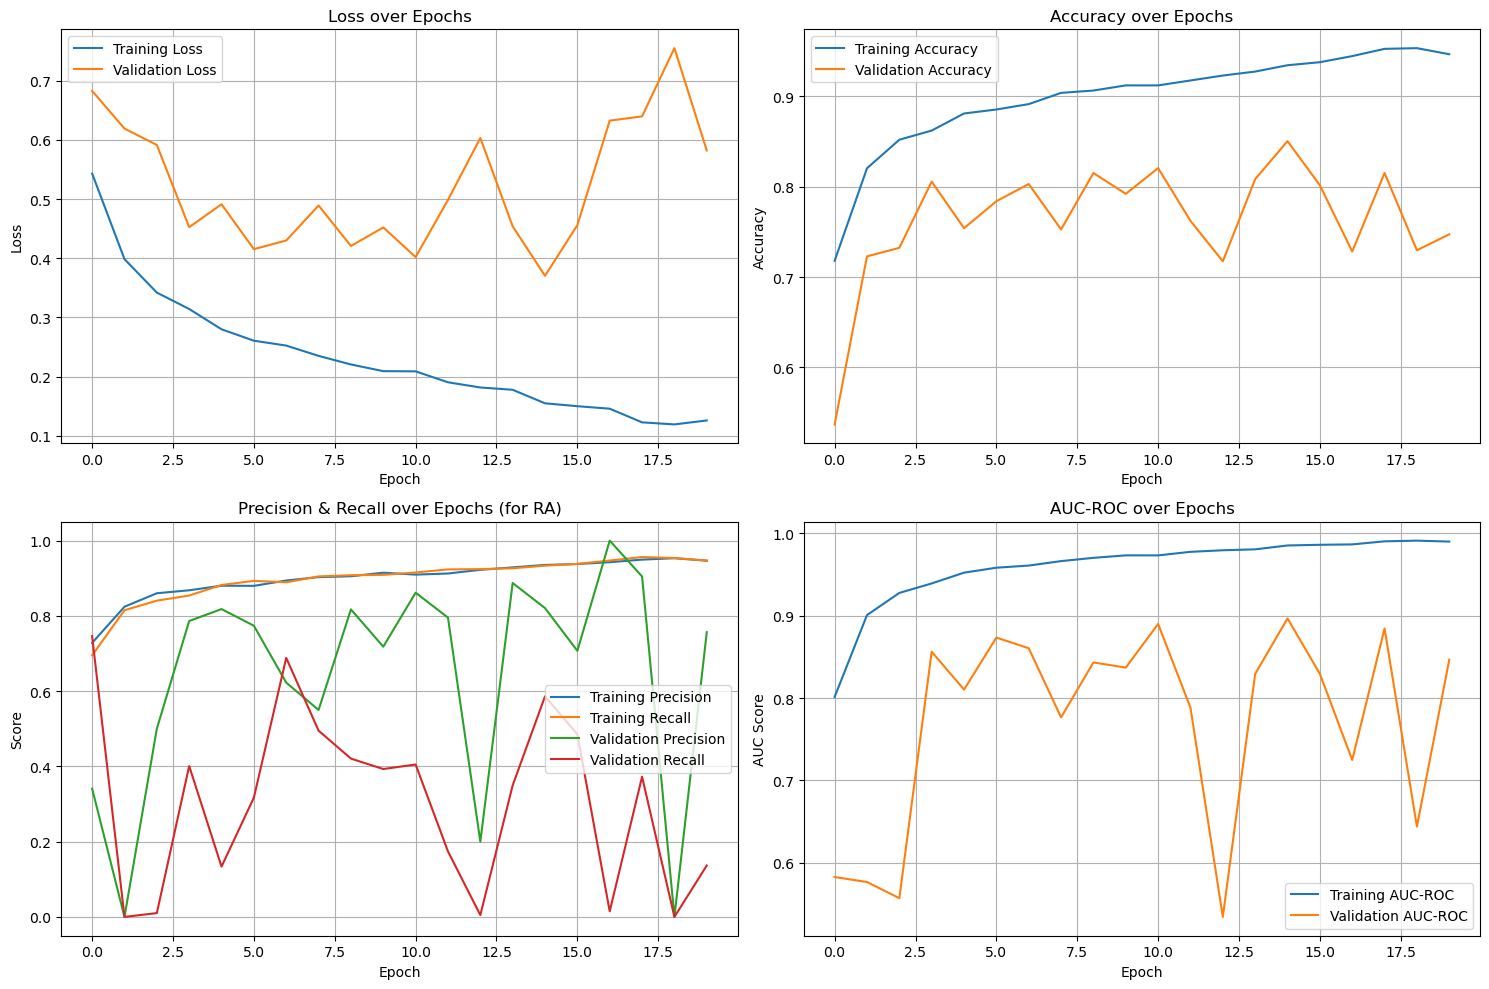

In [9]:
plt.figure(figsize=(15, 10))

# Plot Loss
plt.subplot(2, 2, 1)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(2, 2, 2)
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Precision and Recall
plt.subplot(2, 2, 3)
plt.plot(history_df['precision'], label='Training Precision')
plt.plot(history_df['recall'], label='Training Recall')
plt.plot(history_df['val_precision'], label='Validation Precision')
plt.plot(history_df['val_recall'], label='Validation Recall')
plt.title('Precision & Recall over Epochs (for RA)')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

# Plot AUC-ROC
plt.subplot(2, 2, 4)
plt.plot(history_df['auc_roc'], label='Training AUC-ROC')
plt.plot(history_df['val_auc_roc'], label='Validation AUC-ROC')
plt.title('AUC-ROC over Epochs')
plt.xlabel('Epoch')
plt.ylabel('AUC Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show() # Display the plots
# plt.savefig(os.path.join(MODELS_DIR, 'training_curves.png')) # Save the plots

Found 3886 images belonging to 2 classes.
Found 764 images belonging to 2 classes.
Found 382 images belonging to 2 classes.


2025-06-26 23:59:48.740933: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


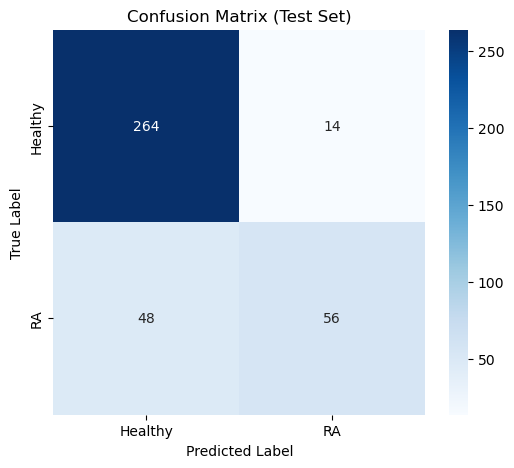

In [22]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, precision_score
import seaborn as sns # For heatmap

# Assuming you have test_generator from a data_loader run
# You might need to rerun data_loader_transfer.py to get test_generator
from src.data_loader_transfer import get_image_data_generators
_, _, test_generator = get_image_data_generators()

# Load the best model
best_model = tf.keras.models.load_model(model_file_path)

# Make predictions (y_pred_probs are probabilities from 0 to 1)
y_pred_probs = best_model.predict(test_generator)
y_pred_binary = (y_pred_probs > 0.5).astype(int) # Apply threshold

# Get true labels (assuming test_generator.classes is available or you manually load labels)
test_generator.reset() # Reset if it's already been iterated
y_true = test_generator.classes

# Plot Confusion Matrix
cm = confusion_matrix(y_true, y_pred_binary)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Healthy', 'RA'], yticklabels=['Healthy', 'RA'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Test Set)')
plt.show()

# (You already calculate F1-Score and Specificity in train_transfer.py,
# so you could just display those from the console output or store them in a summary file.)